In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
def prepare_data(data: pd.DataFrame) -> pd.DataFrame:

    data['Date'] = pd.to_datetime(data['Date'])
    data = data[['Date', 'Open', 'Close']]

    return data

def mean_reversion(data: pd.DataFrame) -> pd.DataFrame:

    data['Close_m1'] = data['Close'].shift(1)
    data['Close_m2'] = data['Close'].shift(2)
    data['Close_m3'] = data['Close'].shift(3)

    data['Signal'] = 0
    data['Signal'][(data['Close_m1'] > data['Close_m2']) & (data['Close_m2'] > data['Close_m3'])] = -1
    data['Signal'][(data['Close_m1'] < data['Close_m2']) & (data['Close_m2'] < data['Close_m3'])] = 1

    data = data[['Date', 'Open', 'Close', 'Signal']]

    return data

def momentum(data: pd.DataFrame) -> pd.DataFrame:

    data['Close_m1'] = data['Close'].shift(1)
    data['Close_m2'] = data['Close'].shift(2)
    data['Close_m3'] = data['Close'].shift(3)

    data['Signal'] = 0
    data['Signal'][(data['Close_m1'] > data['Close_m2']) & (data['Close_m2'] > data['Close_m3'])] = 1
    data['Signal'][(data['Close_m1'] < data['Close_m2']) & (data['Close_m2'] < data['Close_m3'])] = -1

    data = data[['Date', 'Open', 'Close', 'Signal']]

    return data

def calculate_profit(data: pd.DataFrame) -> pd.DataFrame:

    data['PnL'] = (data['Close'] - data['Open']) * data['Signal']
    data['Cum_PnL'] = data['PnL'].cumsum()
    data['ret'] = data['PnL'] / data['Open']

    return data

def plot_result(data: pd.DataFrame, ticker: str, strategy: str):

    plt.figure(figsize=(12,6))
    plt.plot(data['Date'], data['PnL'])
    plt.xlabel('Date')
    plt.ylabel("$")
    plt.title(f'Daily PnL of {ticker} in {strategy} Strategy')
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Cum_PnL'])
    plt.xlabel('Date')
    plt.ylabel("$")
    plt.title(f'Cumulative PnL of {ticker} in {strategy} Strategy')
    plt.show()

def calculate_statistics(data: pd.DataFrame) -> (int, int, int):

    max_drawdown = min(data['ret'])
    mean = np.mean(data['ret'][data['Signal'] != 0]) * 252
    std = np.std(data['ret'][data['Signal'] != 0]) * 252**(1/2)

    return (max_drawdown, mean, std)

In [3]:
def run_mean_reversion(ticker: str):

    # import data
    data = pd.read_csv(f'{ticker}.csv')

    # prepare data
    data = prepare_data(data)

    # mean reversion signal
    data = mean_reversion(data)

    # calculate profit
    data = calculate_profit(data)

    # plot result
    plot_result(data, ticker, 'Mean-Reversion')

    # calculate stats
    max_drawdown, mean, std = calculate_statistics(data)
    print(f'Max daily drawdown is {max_drawdown*100:.3f}%, annualzied return mean is {mean*100:.3f}%, annualzied return std is {std*100:.3f}%')

def run_momentum(ticker: str):

    # import data
    data = pd.read_csv(f'{ticker}.csv')

    # prepare data
    data = prepare_data(data)

    # mean reversion signal
    data = momentum(data)

    # calculate profit
    data = calculate_profit(data)

    # plot result
    plot_result(data, ticker, 'Momentum')

    # calculate stats
    max_drawdown, mean, std = calculate_statistics(data)
    print(f'Max daily drawdown is {max_drawdown*100:.3f}%, annualzied return mean is {mean*100:.3f}%, annualzied return std is {std*100:.3f}%')


<h1> PFE <h1>

<h2> Mean Reversion <h2>

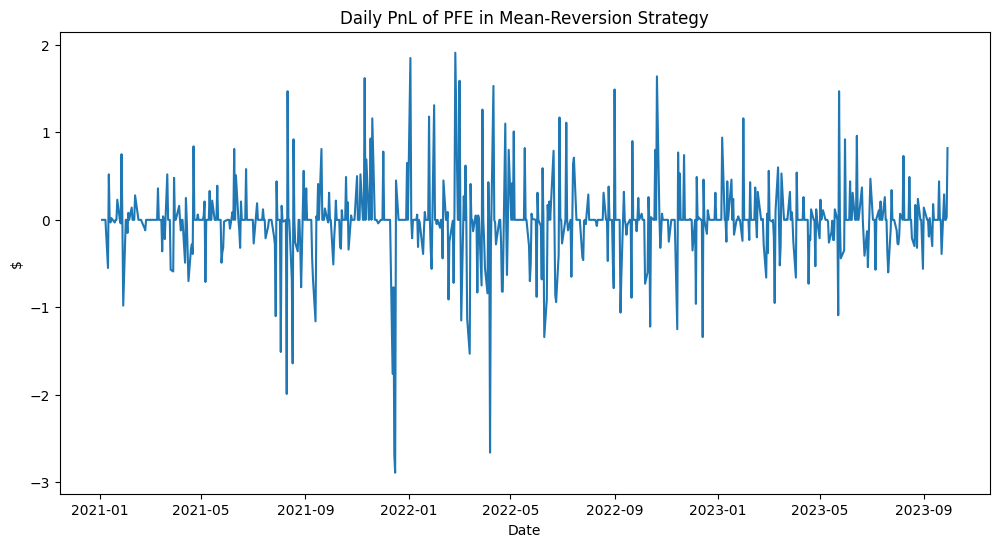

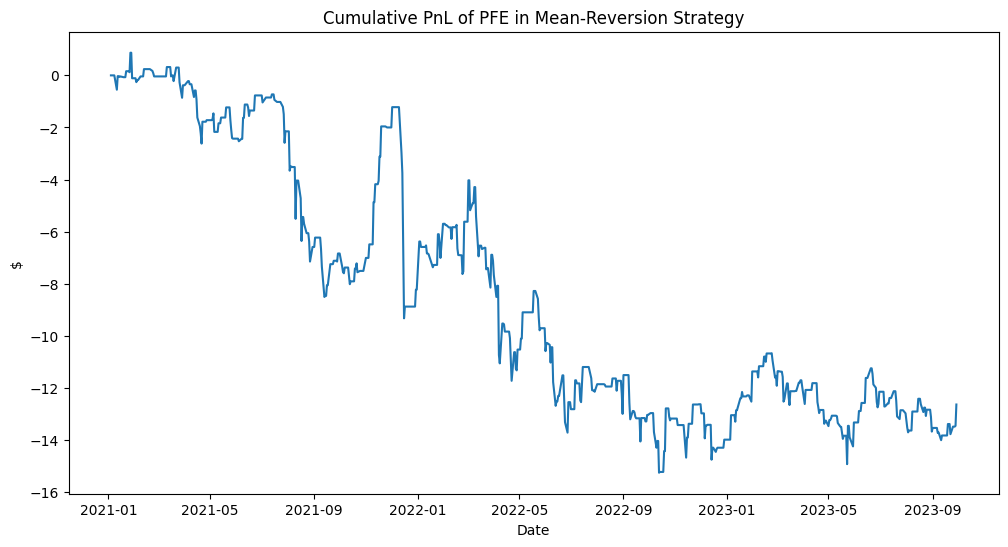

Max daily drawdown is -5.067%, annualzied return mean is -18.631%, annualzied return std is 21.794%


In [6]:
run_mean_reversion("PFE")

<h2> Momentum <h2>

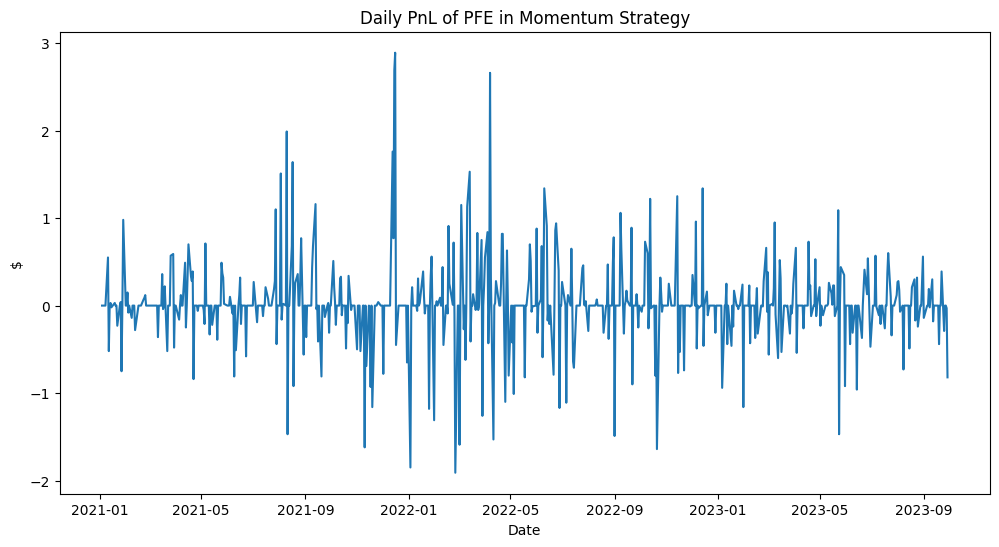

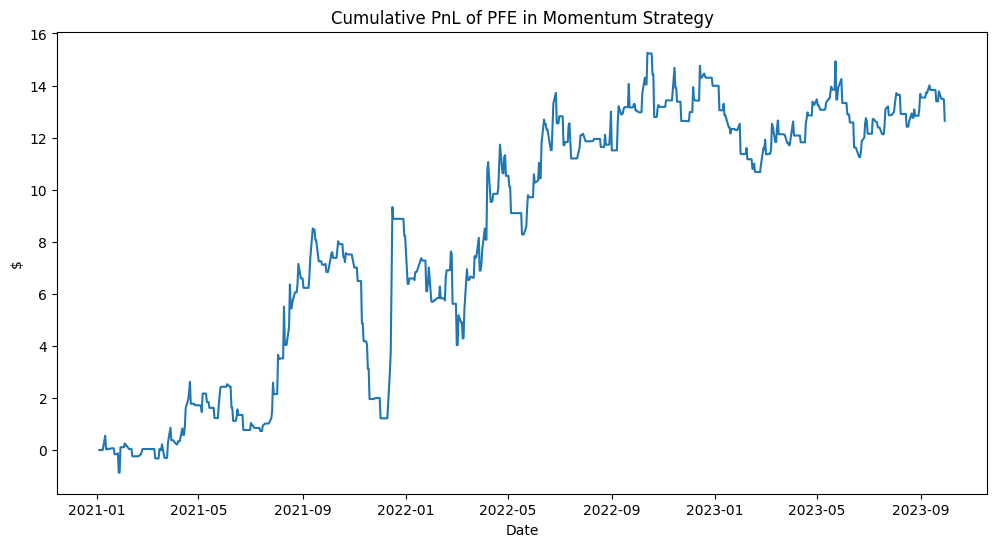

Max daily drawdown is -4.169%, annualzied return mean is 18.631%, annualzied return std is 21.794%


In [7]:
run_momentum("PFE")

<h1> AAPL <h1>

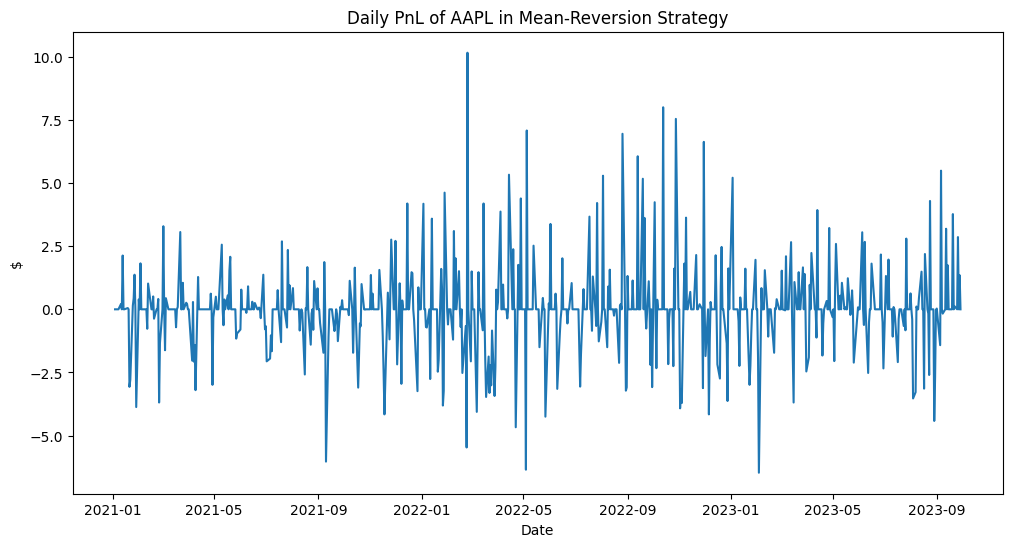

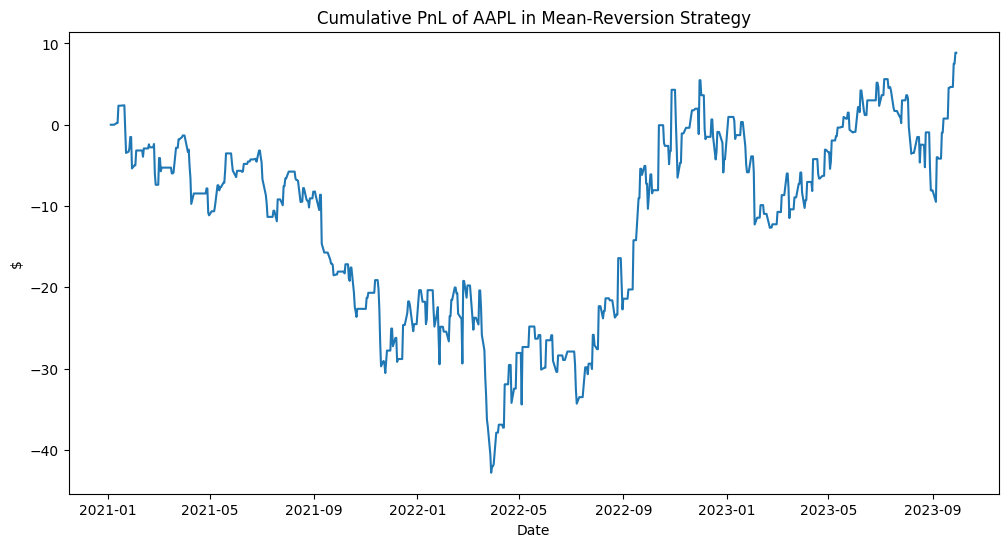

Max daily drawdown is -4.371%, annualzied return mean is 2.668%, annualzied return std is 24.756%


In [8]:
run_mean_reversion("AAPL")

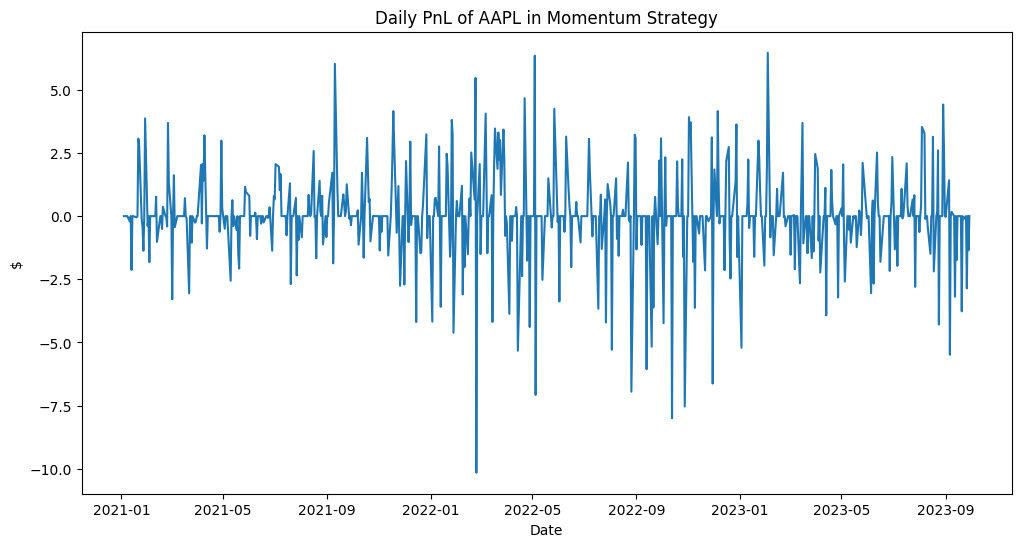

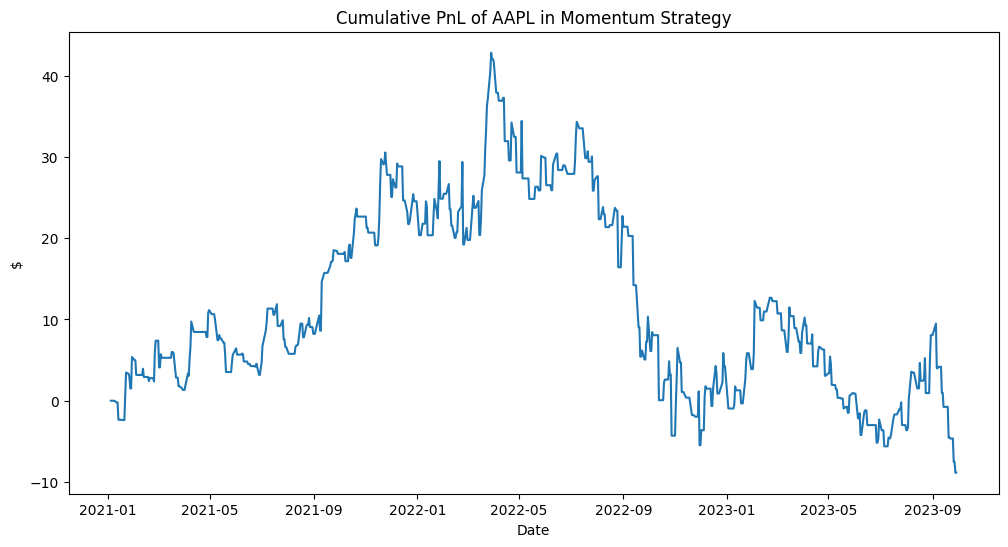

Max daily drawdown is -6.659%, annualzied return mean is -2.668%, annualzied return std is 24.756%


In [9]:
run_momentum("AAPL")